In [8]:
input_shape = (3,12,12) # Format:(channels, rows,cols)
conv_filter = (3,3,3,3)  # Format: (num_filters, channels, rows, cols)
stride = 1
padding = 1
activation = 'relu'

n = conv_filter[1] * conv_filter[2] * conv_filter[3]  # vector_length
flops_per_instance = n + (n-1)    # general defination for number of flops (n: multiplications and n-1: additions)

num_instances_per_filter = (( input_shape[1] - conv_filter[2] + 2*padding) / stride ) + 1  # for rows
num_instances_per_filter *= (( input_shape[1] - conv_filter[2] + 2*padding) / stride ) + 1 # multiplying with cols

flops_per_filter = num_instances_per_filter * flops_per_instance
total_flops_per_layer = flops_per_filter * conv_filter[0]    # multiply with number of filters


print(total_flops_per_layer)

22896.0


In [2]:
import numpy as np
import matplotlib.pyplot as plt

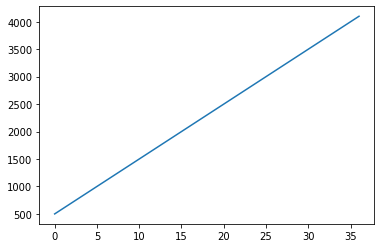

In [70]:
f_base = 500
f_peak = 4.2*(10**3)
f = np.arange(f_base, f_peak, 100)
plt.plot(f)
plt.show()

In [74]:
n = 4
pp = 0.9
total_ins = 100000
ipc = 1.8
parallel_ins = total_ins*pp
serial_ins = total_ins*(1-pp)
#case1 = (total_ins/ipc)/f/10**6
#case2 = (parallel_ins/(ipc*n) + serial_ins/ipc)/f/10**6
#case3 = (parallel_ins/(ipc*n) + serial_ins/ipc)/f/10**6
case4 = (parallel_ins/(ipc*n) + serial_ins/ipc)/f/10**6

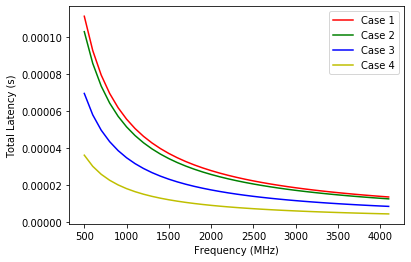

In [75]:
a, = plt.plot(f,case1, 'r',label="Case 1")
b, =plt.plot(f,case2, 'g',label="Case 2")
c, =plt.plot(f,case3, 'b',label="Case 3")
d, =plt.plot(f,case4, 'y',label="Case 4")
plt.ylabel('Total Latency (s)')
plt.xlabel('Frequency (MHz)')
plt.legend(handles=[a,b,c,d], loc='upper right')
plt.show()

In [87]:
n = 1
pp = 0
V_base = 1
V_dd = V_base + 0.15*np.floor((f - f_base)/f_base)
P_static = 1*n
P_dynamic = (0.2*20/(10**(3))*(V_dd**2)*f)*n*pp + (0.2*20/(10**(3))*(V_dd**2)*f)*(1-pp)
P_total = (P_static + P_dynamic)
case1 = P_total

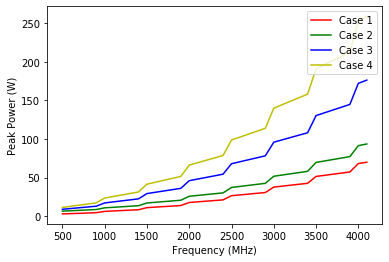

In [88]:
a, = plt.plot(f,case1, 'r',label="Case 1")
b, =plt.plot(f,case2, 'g',label="Case 2")
c, =plt.plot(f,case3, 'b',label="Case 3")
d, =plt.plot(f,case4, 'y',label="Case 4")
plt.ylabel('Peak Power (W)')
plt.xlabel('Frequency (MHz)')
plt.legend(handles=[a,b,c,d], loc='upper right')
plt.show()

In [92]:
n = 1
pp = 0
total_ins = 100000
ipc = 1.8
parallel_ins = total_ins*pp
serial_ins = total_ins*(1-pp)
V_dd = V_base + 0.15*np.floor((f - f_base)/f_base)
P_static = 1*n
P_dynamic = (0.2*20/(10**(3))*(V_dd**2)*f)*n*pp + (0.2*20/(10**(3))*(V_dd**2)*f)*(1-pp)
P_total = (P_static + P_dynamic)
latency = (parallel_ins/(ipc*n) + serial_ins/ipc)/f/10**6

case1 = ((total_ins/1000000)/latency)/(P_total/latency)

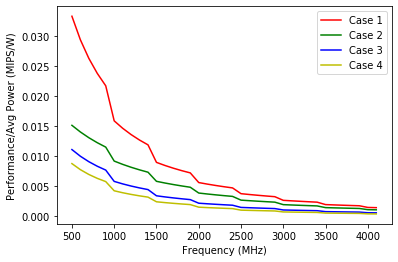

In [93]:
a, = plt.plot(f,case1, 'r',label="Case 1")
b, =plt.plot(f,case2, 'g',label="Case 2")
c, =plt.plot(f,case3, 'b',label="Case 3")
d, =plt.plot(f,case4, 'y',label="Case 4")
plt.ylabel('Performance/Avg Power (MIPS/W)')
plt.xlabel('Frequency (MHz)')
plt.legend(handles=[a,b,c,d], loc='upper right')
plt.show()

In [94]:
f = 4.2*1000
n = 1
pp = 0
V_base = 1
V_dd = V_base + 0.15*np.floor((f - f_base)/f_base)
P_static = 1*n
P_dynamic = (0.2*20/(10**(3))*(V_dd**2)*f)*n*pp + (0.2*20/(10**(3))*(V_dd**2)*f)*(1-pp)
P_total = (P_static + P_dynamic)
ipc = 1.8
parallel_ins = total_ins*pp
serial_ins = total_ins*(1-pp)
latency = (parallel_ins/(ipc*n) + serial_ins/ipc)/f/(10**6)
P_ave = 

In [95]:
print(P_total, latency, P_ave)

71.60199999999999 1.3227513227513228e-05
